In [19]:
%matplotlib widget

import os
import sys
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("/develop/code/evaluation"))
import evaluation as eval

path_results = "/develop/results/spie_journal_2023"
folder_name = "baseline_0"

## 1. Evaluate loss.

/develop/results/spie_journal_2023/baseline_0
/develop/results/spie_journal_2023/baseline_0/params.yaml


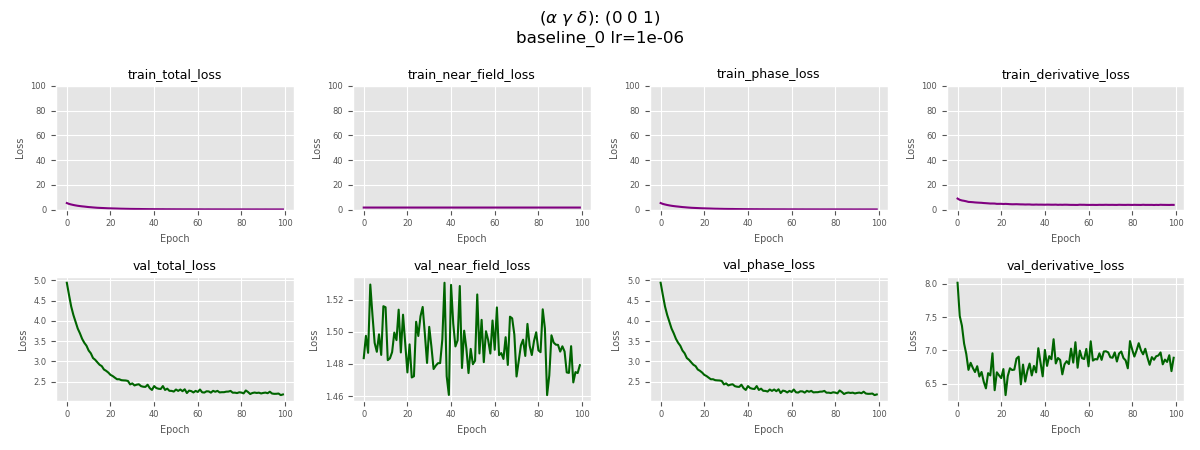

In [20]:
# alpha - near field, gamma - phase, delta - derivatives

folder_path = os.path.join(path_results, folder_name)
single_loss = eval.gather_loss(folder_path)
#all_loss = em.gather_all_loss(path_results, backbone="resnet18")

l_string = r'($\alpha$' + " " + r'$\gamma$' + " " + r'$\delta$)'
title = l_string + f": ({single_loss['alpha']} {single_loss['delta']} {single_loss['gamma']}) " + "\n" + single_loss['title'].replace(path_results,"").replace("/","") + " lr=" + str(single_loss['lr'])

# plt.close("all")

eval.plot_loss(single_loss['loss'], title, save_fig=False)

## 2. Evaluate other metrics

In [21]:
encoder_train_results, encoder_valid_results = eval.get_results(folder_name, "encoder.pkl")
# resim_train_results, resim_valid_results = eval.get_results(folder_name, "resim.pkl")
recon_train_results, recon_valid_results = eval.get_results(folder_name, "recon.pkl")

/develop/results/spie_journal_2023/baseline_0/train_info /develop/results/spie_journal_2023/baseline_0/valid_info
/develop/results/spie_journal_2023/baseline_0/train_info /develop/results/spie_journal_2023/baseline_0/valid_info


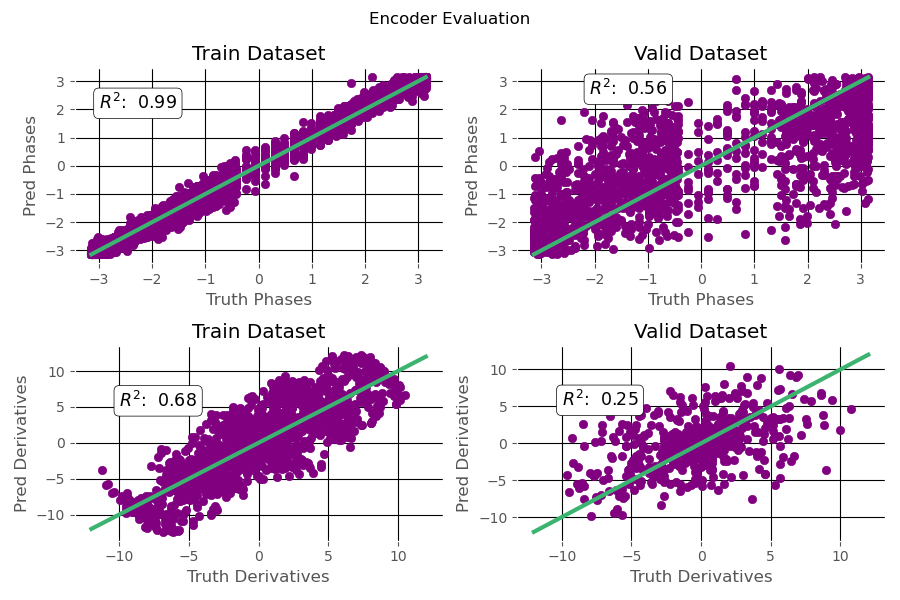

In [22]:
plt.close("all")

eval.get_regression_plots(encoder_train_results, encoder_valid_results, title = "Encoder", save_fig=False)

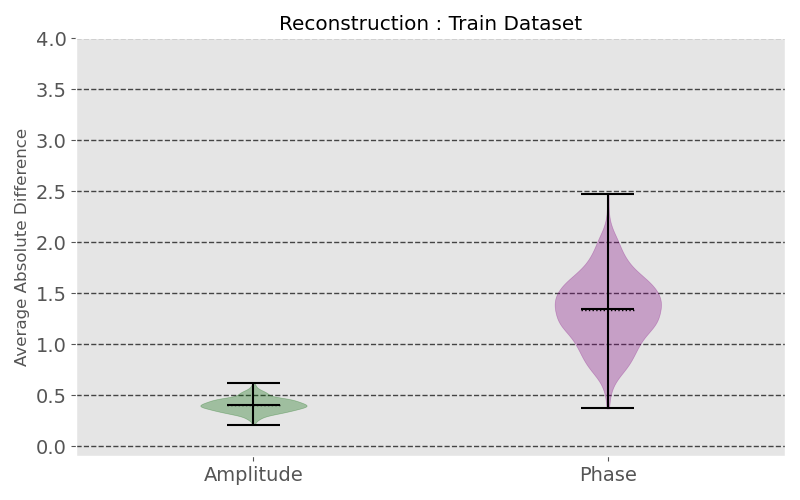

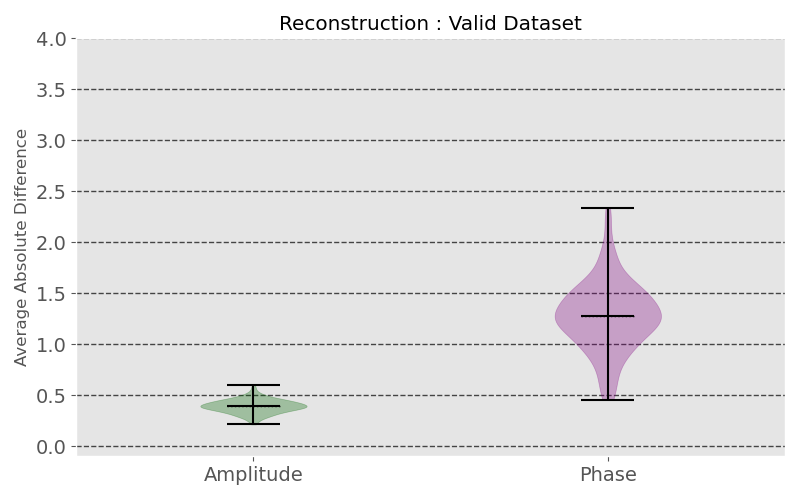

In [26]:
plt.close("all")
# import numpy as np
# colors = ['darkgreen','purple','#4e88d9'] 

# def set_violin_color(vp, color, linewidth=2, linestyle='dotted'):
#     for pc in vp['bodies']:    
#         pc.set_facecolor(color)
#         pc.set_edgecolor(color)
#         pc.set_linewidth(linewidth)

#     for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
#         dashes = (1, 0.2)
#         dashes = [int(dash * 10) for dash in dashes]
#         part = vp[partname]
#         part.set_edgecolor(color)
#         if 'mean' in partname:
#             part.set_linestyle('dotted')
#             part.set_linewidth(linewidth)
            
# def violin_plots(nf_amp_diff, nf_angle_diff, dataset, savefig=False):

#     plt.style.use("ggplot")
    
#     num_models = 1       # (integer) This sets how many boxes next to each other per index
#     buffer = 0.5         # (float)   This sets the spacing between boxes for the same index
#     num_values =  2      # (integer) This sets the number of indices (9 for phase, 6 for curvature)
#     position_offset = 1  # (integer) This sets the offset of the indices - increase if neighboring 'groups' are too close
#     fontsize = 14

#     pos = np.array(range(num_values))*(num_models+position_offset) 
#     fig,ax = plt.subplots(1,1,figsize=(8,5))

#     nf_amp_diff = np.mean(nf_amp_diff, axis=(1,2))
#     nf_angle_diff = np.mean(nf_angle_diff, axis=(1,2))
#     #bp0 = ax.boxplot((nf_amp_diff, nf_angle_diff), sym='', positions = pos - buffer, widths=0.6)
#     vp = ax.violinplot((nf_amp_diff, nf_angle_diff), positions = pos, widths=0.6, showmeans=True, showmedians=True, showextrema=True, 
#                        points=len(nf_amp_diff))

#     vp['bodies'][0].set_facecolor(colors[0])
#     vp['bodies'][0].set_edgecolor(colors[0])
#     vp['bodies'][1].set_facecolor(colors[1])
#     vp['bodies'][1].set_edgecolor(colors[1])
#         #pc.set_linewidth(linewidth)

#     for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
#         dashes = (1, 0.2)
#         dashes = [int(dash * 10) for dash in dashes]
#         part = vp[partname]
#         part.set_edgecolor('black')
#         if 'mean' in partname:
#             part.set_linestyle('dotted')
#             part.set_linewidth(1)
    
#     ax.tick_params(axis='both', labelsize=fontsize)
    
#     ax.set_xticks(range(0, 2*(num_models+position_offset), (num_models+position_offset)))
#     ax.set_xticklabels(['Amplitude', 'Phase'])
#     ax.set_xlim(-(buffer*2), 2*((num_models)+position_offset)-(buffer*2))
#     ax.set_ylim(-0.1,4)
#     ax.grid(axis='x', which='both', linewidth=0)  # Set linewidth to 0 to hide the grid lines
#     ax.grid(axis='y', which='both', linewidth=1, linestyle='--', color='black', alpha=0.7)  # Set linewidth to 0 to hide the grid lines

#     ax.set_ylabel("Average Absolute Difference")
    
#     #Gotta do this to get the legend
#     #Plots empty lines with the correct color and linestyle to match. We will use these in the legend. 
#     # ln0, = ax.plot([], c=colors[0], label='Amplitude', linestyle = 'solid')
#     # ln1, = ax.plot([], c=colors[1], label='Phase', linestyle = 'solid')
#     # leg = ax.legend(handles = [ln0, ln1] , loc='upper left', frameon = True)

#     # leg.get_frame().set_edgecolor('gray')

#     ax.set_title("Reconstruction : {}".format(dataset))
    
#     plt.tight_layout()

# violin_plots(recon_train_results['nf_amp_diff'], recon_train_results['nf_angle_diff'], 
#              'Train Dataset', savefig=False)
# violin_plots(recon_valid_results['nf_amp_diff'], recon_valid_results['nf_angle_diff'],  
#              'Valid Dataset', savefig=False)

eval.violin_plots(recon_train_results['nf_amp_diff'], recon_train_results['nf_angle_diff'], 
             'Train Dataset', savefig=False)
eval.violin_plots(recon_valid_results['nf_amp_diff'], recon_valid_results['nf_angle_diff'],  
             'Valid Dataset', savefig=False)

In [24]:
##### get near field truth, recon, and resim values ####

nf_truth_train = resim_train_results['nf_truth']
nf_truth_valid = resim_valid_results['nf_truth']

nf_recon_train = resim_train_results['nf_pred']
nf_recon_valid = resim_valid_results['nf_pred']

nf_resim_train = em.get_nf_resim(folder_name, target = 'train')
nf_resim_valid = em.get_nf_resim(folder_name, target = 'valid')

NameError: name 'resim_train_results' is not defined

In [ ]:
plt.close("all")

similarity = True
amplitude_matrix, phase_matrix = em.build_custom_conf_matrices(nf_truth_train, nf_recon_train, 
                                                             nf_resim_train, similarity = similarity, savefig=True)
em.plot_custom_confusion_matrix(amplitude_matrix, phase_matrix, similarity=similarity, savefig=True)

In [ ]:
plt.close("all")

similarity = False
amplitude_matrix, phase_matrix = em.build_custom_conf_matrices(nf_truth_train, nf_recon_train, 
                                                             nf_resim_train, similarity = similarity)
em.plot_custom_confusion_matrix(amplitude_matrix, phase_matrix, similarity=similarity, savefig=True)

In [ ]:
plt.close("all")       
em.plot_dft_fields(nf_truth_train, nf_recon_train, nf_resim_train, 
           target = "Near Field, Train Dataset", batch=True, savefig = True)

In [ ]:
plt.close("all")
em.plot_dft_fields(nf_truth_valid, nf_recon_valid, nf_resim_valid, "Near Field, Valid Dataset", batch=True, savefig=True)

In [ ]:
plt.close("all")
em.plot_dft_fields(ff_truth_train, ff_recon_train, ff_resim_train, "Far Field, Train Dataset", batch=True, savefig=True)

In [ ]:
plt.close("all")
em.plot_dft_fields(ff_truth_valid, ff_recon_valid, ff_resim_valid, "Far Field, Valid Dataset", batch=True, savefig=True)

In [ ]:
plt.close("all")
em.plot_dft_fields(nf_truth_train, nf_recon_train, nf_resim_train, "Near Field, Train Dataset", batch=False, idx=0, savefig=True)

In [ ]:
plt.close("all")
em.plot_dft_fields(nf_truth_valid, nf_recon_valid, nf_resim_valid, "Near Field, Valid Dataset", batch=False, idx=6, savefig=True)

In [ ]:
plt.close("all")
em.plot_dft_fields(ff_truth_train, ff_recon_train, ff_resim_train, "Far Field, Train Dataset", batch=False, idx=0, savefig=True)

In [ ]:
plt.close("all")
em.plot_dft_fields(ff_truth_valid, ff_recon_valid, ff_resim_valid, "Far Field, Valid Dataset", batch=False, idx=0, savefig=True)